Many aspects of the world in which we live
can be accurately modeled only as stochastic processes.
A process is stochastic if its next state can depend upon some random
element. The outcome of a stochastic process is usually uncertain.
Therefore, we can rarely make definitive statements about what a
stochastic process will do. Instead, we make probabilistic statements
about what they might do.

A simulation mimics the activity of a real system. For example,
the code in Figure 10-11 simulates a person making a series of
mortgage payments. Think of that code as an experimental device,
called a simulation model, that provides useful information about
the possible behaviors of the system being modeled. Among other
things, simulations are widely used to predict a future state of a
physical system (e.g., the temperature of the planet 50 years from
now), and in lieu of real-world experiments that would be too
expensive, time consuming, or dangerous to perform (e.g., the
impact of a change in the ta

It is 
It is important to always remember that simulation models, like
all models, are only an approximation of reality. We can never be
sure that the actual system will behave in the way predicted by the
model. In fact, we can usually be pretty confident that the actual
system will not behave exactly as predicted by the model. For
example, not every borrower will make all mortgage payments on
time. It is a commonly quoted truism that “all models are wrong, but
som

Not everything in the world has a cause and affect relationship. Some things are just random, and can't be predicted. "God does not play dice" - Einsteine are useful.”x code).

In [4]:
import random
 
def rollDie():
    """returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])
 
def testRoll(n = 10):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

testRoll(5)

61413


In [29]:
#random.seed(0)

def runSim(goal, numTrials, txt): #seeing probabily of specific goal dice outcome
    total = 0 #initialize variable
    for i in range(numTrials): #run trials
        result = ''
        for j in range(len(goal)):
            result += str(rollDie()) #adds the str, not the int
        if result == goal:
            total += 1
    print('Actual probability of', txt, '=', #compare actual probability
          round(1/(6**len(goal)), 8)) 
    estProbability = round(total/numTrials, 8)
    print('Estimated Probability of', txt, '=', #compare estimated probailty based on results
          round(estProbability, 8))
    
runSim('11111', 1000000, '11111')

Actual probability of 11111 = 0.0001286
Estimated Probability of 11111 = 0.000127


In [31]:
def sameDate(numPeople, numSame): #odds of num people, and number of same birthdays
    possibleDates = range(366) # 365 days
#    possibleDates = 4*list(range(0, 57)) + [58]\
#                    + 4*list(range(59, 366))\
#                    + 4*list(range(180, 270))
    birthdays = [0]*366 #create list of days 
    for p in range(numPeople):
        birthDate = random.choice(possibleDates) #choose random number from the range
        birthdays[birthDate] += 1 #increase that day by count of one
    return max(birthdays) >= numSame #how many had matching dates equal to or more than we were looking to match 2,3,4 etc

def birthdayProb(numPeople, numSame, numTrials): #calculate the probabilty
    numHits = 0
    for t in range(numTrials):
        if sameDate(numPeople, numSame): #if sameDate returns anything, then it would be true
            numHits += 1
    return numHits/numTrials # odds

import math

for numPeople in [10, 20, 40, 100]: #try for diff sizes of rooms
    print('For', numPeople,
          'est. prob. of a shared birthday is',
          birthdayProb(numPeople, 3, 10000))
    '''
    
    (1 - (365!/((365^N)*(365-N)!)))'''
    numerator = math.factorial(366)
    denom = (366**numPeople)*math.factorial(366-numPeople) 
    print('Actual prob. for N = 100 =',
          1 - numerator/denom)

For 10 est. prob. of a shared birthday is 0.001
Actual prob. for N = 100 = 0.1166454118039999
For 20 est. prob. of a shared birthday is 0.0071
Actual prob. for N = 100 = 0.4105696370550831
For 40 est. prob. of a shared birthday is 0.0658
Actual prob. for N = 100 = 0.89054476188945
For 100 est. prob. of a shared birthday is 0.6385
Actual prob. for N = 100 = 0.9999996784357714


## Random Walks

Modern portfolio analysis in the stock market is often modeled with random walks.

Can model a random walk with a simulation.

In [33]:
import random, pylab

In [39]:
class Location(object):
    def __init__(self, x, y):
        """x and y are numbers"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are numbers"""
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5 #distance formula 

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

In [40]:
class Field(object): #dictionary, mapping drunks to their locations in the field
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc): #adds drunks location to map
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk') #if drunk already there, steps are not 0
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk): # moves the drunk a radom step
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        #use move method of Location to get new location
        self.drunks[drunk] = self.drunks[drunk].move(xDist, yDist) #adds xdist, ydist to current location
        
    def getLoc(self, drunk): # return drunks location
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

class Drunk(object): #base class, only purpose is to be inherited by other classes
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)

class MasochistDrunk(Drunk): # biased random walk
    def takeStep(self):
        stepChoices = [(0.0,1.1), (0.0,-0.9),
                       (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

def walk(f, d, numSteps):
    """Assumes: f a Field, d a Drunk in f, and numSteps an int >= 0.
       Moves d numSteps times, and returns the distance between
       the final location and the location at the start of the 
       walk."""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))
    
def simWalks(numSteps, numTrials, dClass): 
    """Assumes numSteps an int >= 0, numTrials an int > 0,
         dClass a subclass of Drunk
       Simulates numTrials walks of numSteps steps each.
       Returns a list of the final distances for each trial"""
    Homer = dClass('Homer')
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numTrials), 1))
    return distances

def drunkTest(walkLengths, numTrials, dClass):
    """Assumes walkLengths a sequence of ints >= 0
         numTrials an int > 0, dClass a subclass of Drunk
       For each number of steps in walkLengths, runs simWalks with
         numTrials walks and prints results"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))
        
random.seed(0)
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 8.634
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 100 steps
 Mean = 8.57
 Max = 22.0 Min = 0.0
UsualDrunk random walk of 1000 steps
 Mean = 9.206
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 10000 steps
 Mean = 8.727
 Max = 23.5 Min = 1.4


### Does the above output look correct? 
Lets run a sanity check, with a small number of steps where we would know the outcome

In [41]:
random.seed(0)
drunkTest((0, 1, 2), 100, UsualDrunk)

UsualDrunk random walk of 0 steps
 Mean = 8.634
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 1 steps
 Mean = 8.57
 Max = 22.0 Min = 0.0
UsualDrunk random walk of 2 steps
 Mean = 9.206
 Max = 21.6 Min = 1.4


The code is wrong in the walk() function. 
* distances.append(round(walk(f, Homer, numTrials), 1)) 
* distances.append(round(walk(f, Homer, numSteps), 1))

In [44]:
def simWalks(numSteps, numTrials, dClass): 
    """Assumes numSteps an int >= 0, numTrials an int > 0,
         dClass a subclass of Drunk
       Simulates numTrials walks of numSteps steps each.
       Returns a list of the final distances for each trial"""
    Homer = dClass('Homer')
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    return distances

random.seed(0)
drunkTest((0, 1, 2, 10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 0 steps
 Mean = 0.0
 Max = 0.0 Min = 0.0
UsualDrunk random walk of 1 steps
 Mean = 1.0
 Max = 1.0 Min = 1.0
UsualDrunk random walk of 2 steps
 Mean = 1.218
 Max = 2.0 Min = 0.0
UsualDrunk random walk of 10 steps
 Mean = 2.962
 Max = 7.2 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 8.474
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 26.994
 Max = 72.6 Min = 2.8
UsualDrunk random walk of 10000 steps
 Mean = 90.226
 Max = 236.7 Min = 15.8


In [55]:
def simAll(drunkKinds, walkLengths, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)
        
random.seed(0)
simAll((UsualDrunk, MasochistDrunk),
      (1000, 10000), 100)

UsualDrunk random walk of 1000 steps
 Mean = 26.828
 Max = 66.3 Min = 4.2
UsualDrunk random walk of 10000 steps
 Mean = 90.073
 Max = 210.6 Min = 7.2
MasochistDrunk random walk of 1000 steps
 Mean = 58.425
 Max = 133.3 Min = 6.7
MasochistDrunk random walk of 10000 steps
 Mean = 515.575
 Max = 694.6 Min = 377.7


### Above we see that the Masochist with his different steps, actually does wander further away

Below we explore plotting in pylab

In [46]:
#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
#set numpoints for legend
pylab.rcParams['legend.numpoints'] = 1    

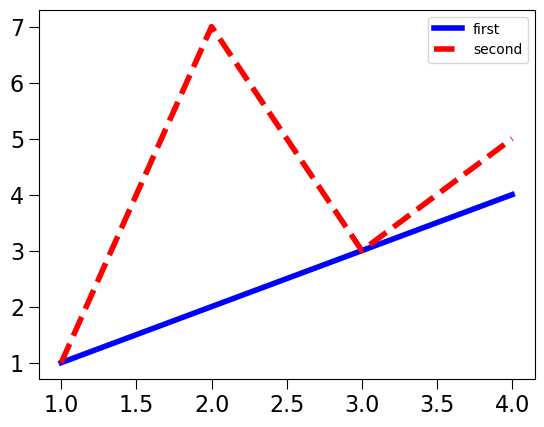

In [47]:
xVals = [1, 2, 3, 4]
yVals1 = [1, 2, 3, 4]
pylab.plot(xVals, yVals1, 'b-', label = 'first')
yVals2 = [1, 7, 3, 5]
pylab.plot(xVals, yVals2, 'r--', label = 'second')
pylab.legend()

In [51]:
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result
    
def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of',
              numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

def simAll(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-', 'b-', 'g-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        pylab.plot(walkLengths, means, curStyle,
                   label = dClass.__name__)
    pylab.title('Mean Distance from Origin ('
                + str(numTrials) + ' trials)')
    pylab.xlabel('Number of Steps')
    pylab.ylabel('Distance from Origin')
    pylab.legend(loc = 'best')

Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of MasochistDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps


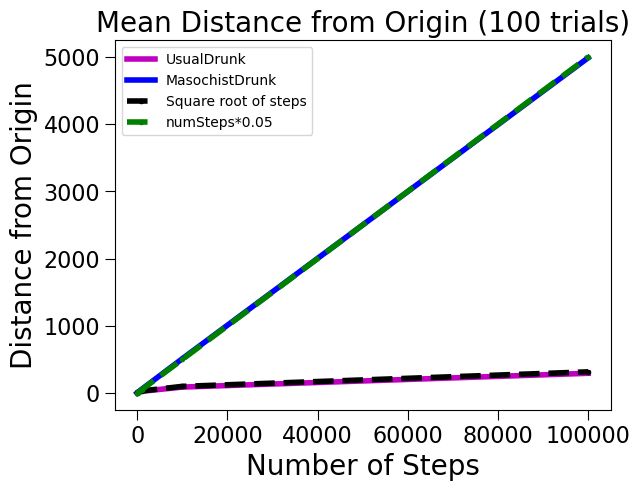

In [52]:
random.seed(0)
numSteps = (10,100,1000,10000,100000)
simAll((UsualDrunk, MasochistDrunk), numSteps, 100)

pylab.plot(numSteps, pylab.array(numSteps)**0.5, 'k--.',
          label = 'Square root of steps')
pylab.plot(numSteps, pylab.array(numSteps)*0.05, 'g--.',
          label = 'numSteps*0.05')
pylab.legend(loc = 'best')

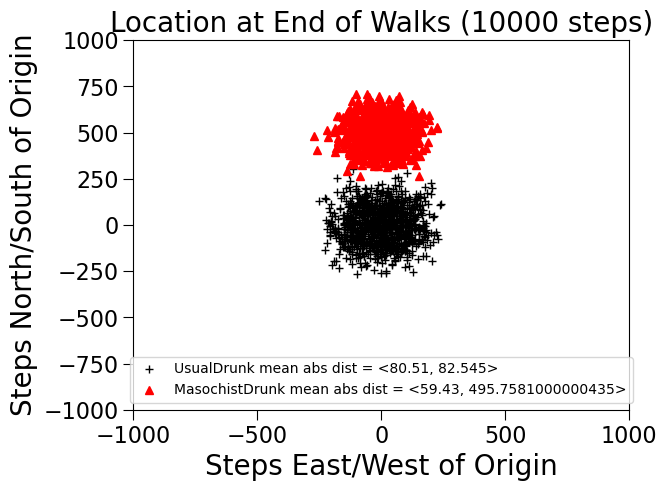

In [53]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for t in range(numTrials):
        f = OddField()
        f.addDrunk(d, Location(0, 0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+', 'r^', 'mo')) #style
    for dClass in drunkKinds: #for each kind of drunl
        locs = getFinalLocs(numSteps, numTrials, dClass) #get the final location coordinates
        xVals, yVals = [], [] # initialize empty lists
        for loc in locs: #append the coordinatest to the lists
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        xVals = pylab.array(xVals) #put the lists into arrays
        yVals = pylab.array(yVals)
        meanX = sum(abs(xVals))/len(xVals) #calculate average absolute distance for each x and y
        meanY = sum(abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle, # plot the arrays of x and y with labels, tites, etc
                      label = dClass.__name__ +\
                      ' mean abs dist = <'
                      + str(meanX) + ', ' + str(meanY) + '>')
    pylab.title('Location at End of Walks ('
                + str(numSteps) + ' steps)')
    pylab.ylim(-1000, 1000)
    pylab.xlim(-1000, 1000)
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'lower center')

random.seed(0)
plotLocs((UsualDrunk, MasochistDrunk), 10000, 1000)

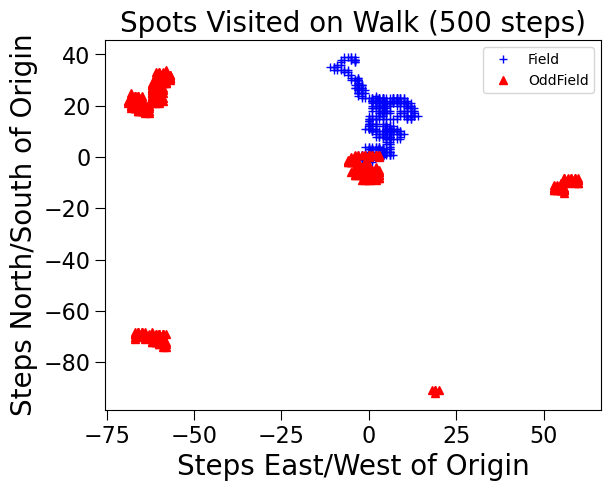

In [54]:
# IF a field was a wormhole

class OddField(Field):
    def __init__(self, numHoles = 1000,
                 xRange = 100, yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)] #tranporting through the wormhole
            
#TraceWalk using oddField          
def traceWalk(fieldKinds, numSteps):
    styleChoice = styleIterator(('b+', 'r^', 'ko'))
    for fClass in fieldKinds:
        d = UsualDrunk()
        f = fClass()
        f.addDrunk(d, Location(0, 0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                   label = fClass.__name__)
    pylab.title('Spots Visited on Walk ('
                + str(numSteps) + ' steps)')
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'best')

random.seed(0)
traceWalk((Field, OddField), 500)